# MATH 210 Introduction to Mathematical Computing

## March 2, 2022

* Riemann sum error formula

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Riemann sum error formula

Introduce notation for the right Riemann sum

$$
R_N(f) = \frac{b-a}{N} \sum_{n=1}^N f(x_n)
$$

The error formula for right/left Riemann sums is

$$
E_R^N(f) = \left| \int_a^b f(x)dx - R_N(f) \right| \leq \frac{(b-a)^2}{2N} K_1
$$

where $| f'(x) | \leq K_1$ for all $x \in [a,b]$.

### Example

Find $N$ which guarantees the error for the right Riemann sum approximation of

$$
\int_1^2 x^x dx
$$

is less than 0.001. First step is to compute $f'(x)$. Use logarithmic differentiation

$$
y = x^x \Rightarrow \ln(y) = x \ln(x) \Rightarrow \frac{1}{y} y' = \ln(x) + 1
\Rightarrow y' = x^x(\ln(x) + 1)
$$

Since $f'(x) = x^x(\ln(x) + 1)$ is increasing on $[1,2]$ we know that $|f'(x)| \leq 2^2(\ln(2)+1) \approx 6.77$

In [2]:
2**2*(np.log(2) + 1)

6.772588722239782

In [3]:
def riemannR(f,a,b,N):
    x = np.linspace(a,b,N+1)
    y = f(x)
    dx = (b - a)/N
    I = np.sum(y[1:])*dx
    return I

def riemannL(f,a,b,N):
    x = np.linspace(a,b,N+1)
    y = f(x)
    dx = (b - a)/N
    I = np.sum(y[:-1])*dx
    return I

In [4]:
f = lambda x: x**x
a = 1; b = 2; E = 0.001; K1 = 2**2*(np.log(2)+1)
N = (b - a)**2/2/E*K1
N

3386.2943611198907

In [5]:
N = 3387
riemannR(f,a,b,N)

2.050889146264305

In [6]:
riemannL(f,a,b,N)

2.0500034066717454

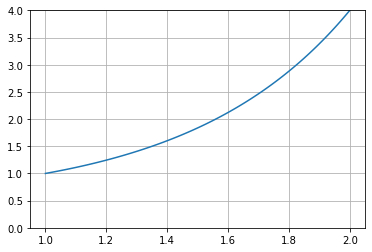

In [7]:
x = np.linspace(1,2,100)
y = x**x
plt.plot(x,y), plt.ylim([0,4]), plt.grid(True)
plt.show()

### Example

Find $N$ which guarantees the error for the right Riemann sum approximation of

$$
\int_0^\pi \frac{\sin(x)}{x} dx
$$


is less than 0.0001.

$$
f'(x) = \frac{x\cos(x) - \sin(x)}{x^2}
$$

Note that $f(x)$ and $f'(x)$ are not defined at $x=0$. We can cheat a bit and plot from just larger than 0 to $\pi$.

0.43616243194087967


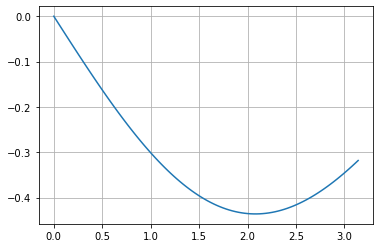

In [8]:
x = np.linspace(0.0001,np.pi,100)
y = (x*np.cos(x) - np.sin(x))/x**2
print(np.max(np.abs(y)))

plt.plot(x,y), plt.grid(True)
plt.show()

In [9]:
a = 0; b = np.pi; E = 0.0001; K1 = 0.43616243194087967
N = (b - a)**2/2/E*K1
N

21523.753289367716

Note that we'll get a warning that we're dividing by 0 when $x=0$. But we're doing the right Riemann sum (which excludes $x_0=0$) and so we can ignore the error.

In [10]:
N = 21524
f = lambda x: np.sin(x)/x
riemannR(f,a,b,N)

/tmp/ipykernel_418/1959407934.py:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda x: np.sin(x)/x


1.85186407258784

We can plot $f(x)$ and again ignore the error at $x=0$.

/tmp/ipykernel_418/3099972879.py:2: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(x)/x


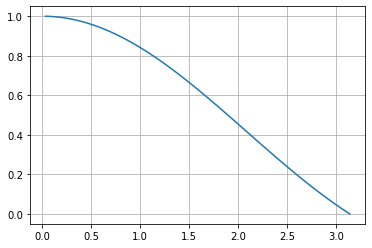

In [11]:
x = np.linspace(0,np.pi,100)
y = np.sin(x)/x
plt.plot(x,y), plt.grid(True)
plt.show()